SVM = Support Vertor Machine = Метод опорных векторов

![svm0.png](attachment:svm0.png)

![svm1.png](attachment:svm1.png)

Разделяющая гиперплоскость: $w^Tx - b = 0$
    
При этом для класса "+1" $w_x - b > 0$, для класса "-1" $w^Tx - b < 0$


Ширина разделяющей полосы - проекция вектора $x_+  − x_-$ на нормаль к гиперплоскости $w$:

\begin{align} w^T(x_+  − x_-)/|w| = (w^Tx_+  − w^Tx_-)/|w| = \left((b + 1) - (b - 1)\right)/|w| = 2/|w| \rightarrow \max \end{align}

\begin{align} |w| \rightarrow \min \end{align}

\begin{align} w^Tw/2 \rightarrow \min \end{align}

Отступ $M = y(w_Tx - b)$, классификатор ошибается тогда и только тогда, когда $M<0$, объект находится на разделяющей полосе тогда и только тогда, когда $0 \le M<1$, классификатор верно классифицирует тогда и только тогда, когда $M \ge 1$

Метод опорных векторов с жестким зазором (запрещено попадание на разделяющую полосу):

\begin{aligned}  w^Tw/2 \rightarrow \min \\
y(w^Tx - b) \ge 1 \end{aligned}


Штраф за $M<0$:
\begin{aligned} Penalty = \sum_i{\max(0, 1 - M_i)} \end{aligned}

Функция потерь:
\begin{aligned} Q = \sum_i{\max(0, 1 - M_i)} + \lambda w^Tw/2 \end{aligned}

Пересчет весов:
\begin{aligned} \nabla Q &= \lambda w - yx,\space при \space yw^Tx  < 1 \\
\nabla Q &=  \lambda w,\space при \space yw^Tx \ge 1\end{aligned}


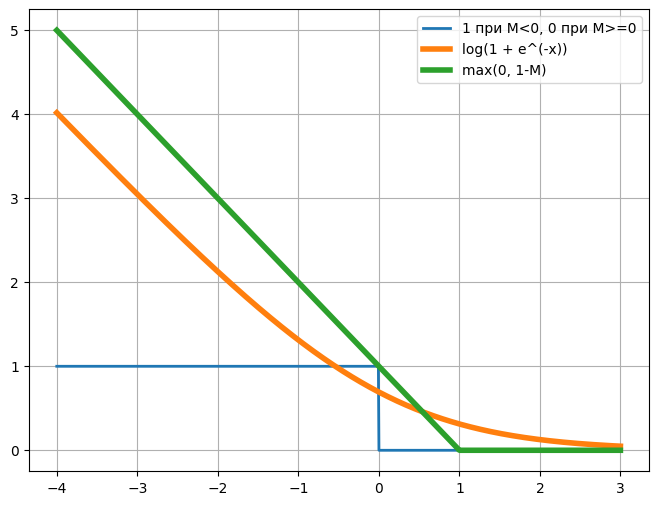

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.rcParams['figure.figsize'] = (8, 6)
xx = np.linspace (-4, 3, 1000)
plt.plot(xx, [(x<0).astype(int) for x in xx], linewidth = 2, label = '1 при M<0, 0 при M>=0')
plt.plot(xx, [np.log(1 + np.exp(-x)) for x in xx], linewidth = 4, label = 'log(1 + e^(-x))')
plt.plot(xx, [np.max(np.array([0, 1-x])) for x in xx], linewidth = 4, label = 'max(0, 1-M)')
plt.grid()
plt.legend()

In [ ]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = int(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
    def predict(self, X:np.array) -> np.array:
        x_ext = add_intercept(X)
        return np.sign(self.w @ x_ext)

    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)

    def fit(self, X, Y, verbose = False):
        X = add_intercept(X)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)
        errors = []
        loss_epoch = []

        for epoch in range(self.max_iter):
            err = 0
            loss = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w/self.max_iter
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w/self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])
                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch,err,loss))
            errors.append(err)
            loss_epoch.append(loss)
        self.history_w = np.array(self.history_w)
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)

epoch 0. Errors=11. Mean Hinge_loss=[10.00286765]
epoch 1. Errors=10. Mean Hinge_loss=[10.00286762]
epoch 2. Errors=10. Mean Hinge_loss=[10.0028676]
epoch 3. Errors=10. Mean Hinge_loss=[10.00286758]
epoch 4. Errors=10. Mean Hinge_loss=[10.00286756]
epoch 5. Errors=10. Mean Hinge_loss=[10.00286753]
epoch 6. Errors=10. Mean Hinge_loss=[10.00286751]
epoch 7. Errors=10. Mean Hinge_loss=[10.00286749]
epoch 8. Errors=10. Mean Hinge_loss=[10.00286746]
epoch 9. Errors=10. Mean Hinge_loss=[10.00286744]
epoch 10. Errors=10. Mean Hinge_loss=[10.00286742]
epoch 11. Errors=10. Mean Hinge_loss=[10.00286739]
epoch 12. Errors=10. Mean Hinge_loss=[10.00286737]
epoch 13. Errors=10. Mean Hinge_loss=[10.00286735]
epoch 14. Errors=10. Mean Hinge_loss=[10.00286733]
epoch 15. Errors=10. Mean Hinge_loss=[10.0028673]
epoch 16. Errors=10. Mean Hinge_loss=[10.00286728]
epoch 17. Errors=10. Mean Hinge_loss=[10.00286726]
epoch 18. Errors=10. Mean Hinge_loss=[10.00286723]
epoch 19. Errors=10. Mean Hinge_loss=[10.00

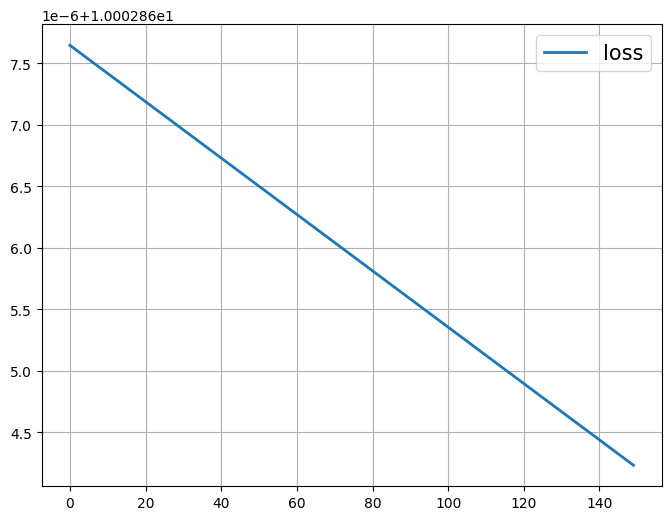

In [ ]:
X = np.array([39, 36, 60, 21, 27, 12, 51, 57, 54, 42, 18, 9, 48, 66, 6, 30, 24, 33, 15, 21]).reshape(20,1)
Y = np.array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0]).reshape(20,1)
svm = SVMClassification(learning_rate=0.005, lam=0.006, max_iter=150)
svm.fit(X, Y, verbose = True)

print(svm.errors)
print(svm.w)

plt.plot(svm.loss, linewidth=2, label='loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
Y[Y == 0] = -1
Y[Y > 0] = 1


epoch 0. Errors=88. Mean Hinge_loss=49.88729951113359
epoch 1. Errors=46. Mean Hinge_loss=19.687425738454248
epoch 2. Errors=31. Mean Hinge_loss=11.027428209048507
epoch 3. Errors=22. Mean Hinge_loss=7.080264708030638
epoch 4. Errors=15. Mean Hinge_loss=4.761058709518251
epoch 5. Errors=13. Mean Hinge_loss=3.7733878070796263
epoch 6. Errors=11. Mean Hinge_loss=3.288090803948563
epoch 7. Errors=10. Mean Hinge_loss=3.15515526583745
epoch 8. Errors=10. Mean Hinge_loss=2.9856690084438746
epoch 9. Errors=10. Mean Hinge_loss=2.8548512561167896
epoch 10. Errors=7. Mean Hinge_loss=2.7972044914648824
epoch 11. Errors=7. Mean Hinge_loss=2.765636845192729
epoch 12. Errors=6. Mean Hinge_loss=2.6730318073935218
epoch 13. Errors=7. Mean Hinge_loss=2.636929284647303
epoch 14. Errors=7. Mean Hinge_loss=2.6080053623024644
epoch 15. Errors=6. Mean Hinge_loss=2.5348610408116685
epoch 16. Errors=7. Mean Hinge_loss=2.4989388158224215
epoch 17. Errors=7. Mean Hinge_loss=2.4653617618981576
epoch 18. Errors=6

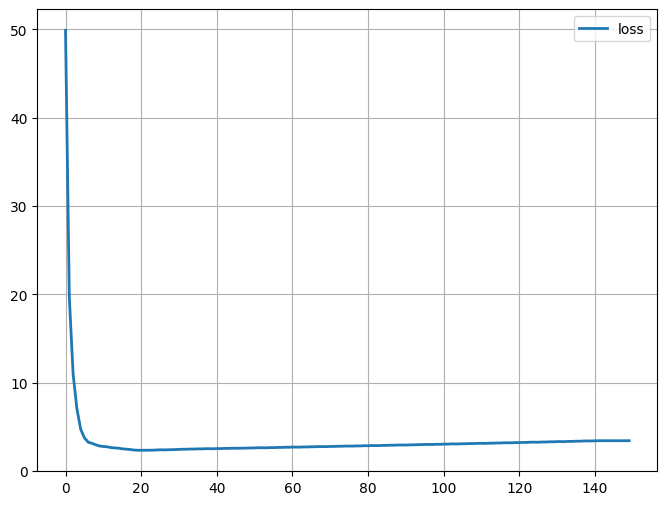

In [ ]:
np.random.seed(123)
svm = SVMClassification(learning_rate = 0.005, lam = 0.006, max_iter = 150)
svm.fit(X, Y, verbose = True)
print(svm.errors)
print(svm.w)
plt.plot(svm.loss, linewidth = 2, label = 'loss')
plt.grid()
plt.legend()
plt.show()

Реализовать классификацию методом svm для набора данных  German Credit Cards UCI.csv

In [ ]:
import pandas as pd

import sklearn.datasets
from sklearn.decomposition import PCA

import numpy as np


df = pd.read_csv('German Credit Cards UCI.csv')
data = df.copy()

data

,Customer ID,Checking Account Status,Loan Duration (Months),Credit History,Purpose,Loan Amount,Savings Account Balance,Present Employment Time (Years),Installment Rate in Percentage of Disposable Income,Personal Status and Gender,...,Property,Age (Years),Other Credits,Home Ownership,Number of Existing Credits at This Bank,Job Category,Number of Dependents,Telephone,Foreign Worker Status,Loan Status
0,1122334,< 0 DM,6,critical account - other non-bank loans,radio/television,1169,unknown/none,>= 7 years,4,male-single,...,real estate,67,none,own,2,skilled,1,yes,yes,fully paid
1,6156361,0 - 200 DM,48,current loans paid,radio/television,5951,< 100 DM,1 - 4 years,2,female-divorced/separated/married,...,real estate,22,none,own,1,skilled,1,none,yes,charged off
2,2051359,none,12,critical account - other non-bank loans,education,2096,< 100 DM,4 - 7 years,2,male-single,...,real estate,49,none,own,1,unskilled-resident,2,none,yes,fully paid
3,8740590,< 0 DM,42,current loans paid,furniture/equipment,7882,< 100 DM,4 - 7 years,2,male-single,...,building society savings/life insurance,45,none,for free,1,skilled,2,none,yes,fully paid
4,3924540,< 0 DM,24,past payment delays,car (new),4870,< 100 DM,1 - 4 years,3,male-single,...,unknown-none,53,none,for free,2,skilled,2,none,yes,charged off
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,3130615,none,12,current loans paid,radio/television,804,< 100 DM,>= 7 years,4,male-single,...,car or other,38,none,own,1,skilled,1,none,yes,fully paid
1010,6267789,< 0 DM,45,current loans paid,radio/television,1845,< 100 DM,1 - 4 years,4,male-single,...,unknown-none,23,none,for free,1,skilled,1,yes,yes,charged off
1011,6959896,0 - 200 DM,45,critical account - other non-bank loans,car (used),4576,100 - 500 DM,unemployed,3,male-single,...,car or other,27,none,own,1,skilled,1,none,yes,fully paid
1012,1099632,none,48,critical account - other non-bank loans,business,7629,unknown/none,>= 7 years,4,male-divorced/separated,...,car or other,46,bank,own,2,highly skilled,2,none,yes,fully paid


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['Checking Account Status',
                       'Credit History',
                       'Purpose',
                       'Savings Account Balance',
                       'Present Employment Time (Years)',
                       'Personal Status and Gender',
                       'Other Debtors / Guarantors',
                       'Property', 'Other Credits',
                       'Home Ownership',
                       'Job Category',
                       'Telephone',
                       'Foreign Worker Status',
                       'Loan Status']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
y = data['Loan Status']
data.drop('Customer ID', axis= 1 , inplace= True)
data.drop('Loan Status', axis= 1 , inplace= True)
x = data.copy()
x = (x - x.mean()) / x.std()
intercept = np.ones((x.shape[0], 1))
x = pd.DataFrame(np.concatenate((intercept, x), axis = 1))
x

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,-0.463744,-1.234074,-0.898589,1.153700,-0.745584,1.668760,1.100408,0.920391,0.833423,...,1.048439,0.638143,2.757680,0.220354,-0.128447,1.021881,-0.290584,-0.429415,1.210664,0.197221
1,1.0,-1.260755,2.242820,0.191326,1.153700,0.946553,-0.132329,-1.129733,-0.865784,-1.386606,...,-0.761122,0.638143,-1.192499,0.220354,-0.128447,-0.702224,-0.290584,-0.429415,-0.825179,0.197221
2,1.0,1.130278,-0.737374,-0.898589,0.049372,-0.417560,-0.132329,-0.386352,-0.865784,0.833423,...,0.143658,0.638143,1.177609,0.220354,-0.128447,-0.702224,1.821620,2.326452,-0.825179,0.197221
3,1.0,-0.463744,1.746121,0.191326,0.417481,1.629848,-0.132329,-0.386352,-0.865784,0.833423,...,1.048439,-1.359007,0.826482,0.220354,-2.016059,-0.702224,-0.290584,2.326452,-0.825179,0.197221
4,1.0,-0.463744,0.256024,2.371158,-1.054957,0.564035,-0.132329,-1.129733,0.027303,0.833423,...,1.048439,1.636717,1.528736,0.220354,-2.016059,1.021881,-0.290584,2.326452,-0.825179,0.197221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,1.0,1.130278,-0.737374,0.191326,1.153700,-0.874741,-0.132329,1.100408,0.920391,0.833423,...,1.048439,-0.360432,0.212009,0.220354,-0.128447,-0.702224,-0.290584,-0.429415,-0.825179,0.197221
1010,1.0,-0.463744,1.994471,0.191326,1.153700,-0.506378,-0.132329,-1.129733,0.920391,0.833423,...,1.048439,1.636717,-1.104717,0.220354,-2.016059,-0.702224,-0.290584,-0.429415,1.210664,0.197221
1011,1.0,-1.260755,1.994471,-0.898589,-0.686847,0.460002,-1.933417,1.843788,0.027303,0.833423,...,1.048439,-0.360432,-0.753590,0.220354,-0.128447,-0.702224,-0.290584,-0.429415,-0.825179,0.197221
1012,1.0,1.130278,2.242820,-0.898589,-1.423066,1.540323,1.668760,1.100408,0.920391,-0.646596,...,-0.761122,-0.360432,0.914263,-2.156659,-0.128447,1.021881,-1.346686,2.326452,-0.825179,0.197221


In [ ]:
def add_intercept(a):
    a_ext = np.zeros((a.shape[0], a.shape[1]+1))
    a_ext[:, 0] = int(1)
    a_ext[:, 1:] = a
    return a_ext

class SVMClassification(object):
    def __init__(self, learning_rate = 0.01, lam = 0.1, max_iter = 200):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.lam = lam
        self.w = None
        self.history_w = []
        self.errors = None
        self.loss = None
        self.test_error = None
        self.test_loss = None
        self.f1_train = None
        self.f1_test = None
        self.steps = None
        self.accuracy_train = None
        self.accuracy_test = None

    def predict(self, X:np.array) -> np.array:

        return np.sign(np.dot(X, self.w))

    def hinge_loss(self, x, y):
        return max(0, 1 - y*(x@self.w))

    def soft_margin_loss(self, x, y):
        return self.hinge_loss(x, y) + self.lam*(self.w @ self.w)

    def accuracy(self, x, Y):
        return ((self.predict(x)>0.5)==Y).mean()

    def f1_score(self, x, y):
        df = pd.DataFrame()
        df['y'] = y
        df['y_predict'] = self.predict(x)

        TP = df[(df['y_predict'] > 0.5) & df['y'] == 1]
        FP = df[(df['y_predict'] > 0.5) & df['y'] == 0]
        FN = df[(df['y_predict'] < 0.5) & df['y'] == 1]

        precision = len(TP) / (len(TP) + len(FP))
        recall = len(TP) / (len(TP) + len(FN))
        return 2*precision*recall / (precision + recall)

    def fit(self, X, Y, x_test, y_test, verbose = False):
        X = add_intercept(X)
        x_test = add_intercept(x_test)
        self.w = np.random.normal(loc=0, scale=0.05, size=X.shape[1])
        self.history_w.append(self.w)

        errors = []
        loss_epoch = []
        test_error = []
        test_loss = []
        f1_train = []
        f1_test = []
        steps = []
        accuracy_train = []
        accuracy_test = []

        for epoch in range(self.max_iter):
            err = 0
            loss = 0
            err_test = 0
            loss_test = 0
            f_test = 0
            f_train = 0
            acc_train = 0
            for i, x in enumerate(X):
                margin = Y[i]*(self.w @ X[i])
                if margin >= 1: # классифицируем верно
                    self.w -= self.learning_rate*self.lam*self.w/self.max_iter
                    loss += self.soft_margin_loss(X[i],Y[i])
                else: # классифицируем неверно или попадаем на полосу разделения при 0<m<1
                    self.w += self.learning_rate*(Y[i]*X[i] - self.lam*self.w/self.max_iter)
                    err += 1
                    loss += self.soft_margin_loss(X[i],Y[i])

                if i < len(x_test):
                  loss_test += self.soft_margin_loss(x_test[i], y_test[i])
                  if y_test[i] * (self.w @ x_test[i]) < 1:
                    err_test += 1

                self.history_w.append(self.w)
            if verbose:
                print('epoch {}. Errors={}. Mean Hinge_loss={}'.format(epoch,err,loss))

            f_train = self.f1_score(X, Y)
            f_test = self.f1_score(x_test, y_test)

            acc_train = self.accuracy(X, Y)
            acc_test = self.accuracy(x_test, y_test)

            errors.append(err)
            loss_epoch.append(loss)
            test_error.append(err_test)
            test_loss.append(loss_test)
            f1_train.append(f_train)
            f1_test.append(f_test)
            steps.append(epoch)
            accuracy_train.append(acc_train)
            accuracy_test.append(acc_test)

        self.history_w = np.array(self.history_w)
        self.errors = np.array(errors)
        self.loss = np.array(loss_epoch)
        self.test_errors = np.array(test_error)
        self.test_loss = np.array(test_loss)
        self.f1_train = np.array(f1_train)
        self.f1_test = np.array(f1_test)
        self.steps = np.array(steps)
        self.accuracy_train = np.array(accuracy_train)
        self.accuracy_test = np.array(accuracy_test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x, y, train_size=0.5, random_state=1000)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train, y_train = oversampler.fit_resample(x_train, y_train)
x_test, y_test = oversampler.fit_resample(x_test, y_test)

In [ ]:
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)
y_train[y_train == 0] = -1
y_train[y_train > 0] = 1
y_test[y_test == 0] = -1
y_test[y_test > 0] = 1
svm = SVMClassification(learning_rate=0.0005, lam=0.0006, max_iter=100)
svm.fit(x_train, y_train, x_test, y_test, verbose = True)
print(svm.errors)
print(svm.w)


epoch 0. Errors=728. Mean Hinge_loss=682.629915906166
epoch 1. Errors=715. Mean Hinge_loss=545.320297638094
epoch 2. Errors=640. Mean Hinge_loss=435.49582050620154
epoch 3. Errors=512. Mean Hinge_loss=384.254004134234
epoch 4. Errors=419. Mean Hinge_loss=368.276660801497
epoch 5. Errors=384. Mean Hinge_loss=364.88747373930323
epoch 6. Errors=370. Mean Hinge_loss=364.38965519460936
epoch 7. Errors=368. Mean Hinge_loss=364.3328279602392
epoch 8. Errors=365. Mean Hinge_loss=364.30790292868585
epoch 9. Errors=365. Mean Hinge_loss=364.2935036282294
epoch 10. Errors=364. Mean Hinge_loss=364.29370096400754
epoch 11. Errors=364. Mean Hinge_loss=364.29369968112434
epoch 12. Errors=364. Mean Hinge_loss=364.2936983982463
epoch 13. Errors=364. Mean Hinge_loss=364.2936971153752
epoch 14. Errors=364. Mean Hinge_loss=364.29369583250906
epoch 15. Errors=364. Mean Hinge_loss=364.29369454964836
epoch 16. Errors=364. Mean Hinge_loss=364.2936932667933
epoch 17. Errors=364. Mean Hinge_loss=364.293691983943

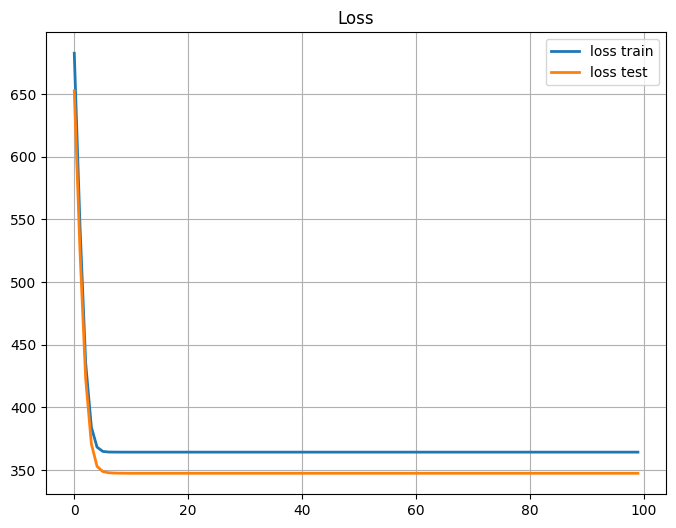

In [ ]:
plt.title('Loss')
plt.plot(svm.loss, linewidth = 2, label = 'loss train')
plt.plot(svm.test_loss, linewidth = 2, label = 'loss test')
plt.grid()
plt.legend()
plt.show()

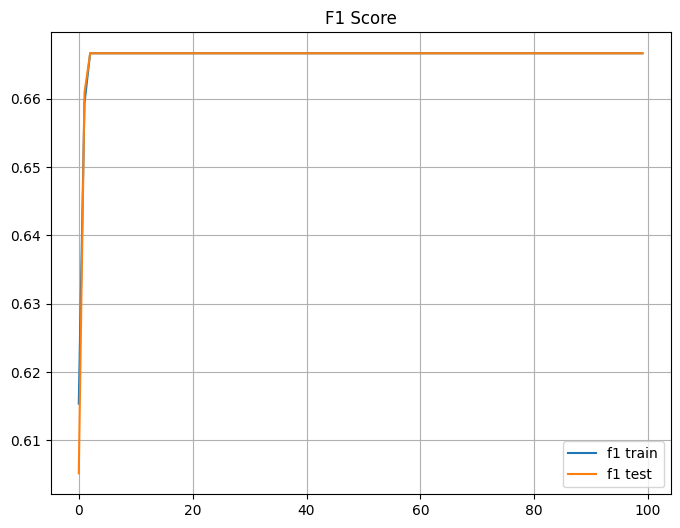

In [ ]:
plt.title('F1 Score')
plt.plot(svm.steps, svm.f1_train, label = 'f1 train')
plt.plot(svm.steps, svm.f1_test, label = 'f1 test')
plt.grid()
plt.legend()
plt.show()

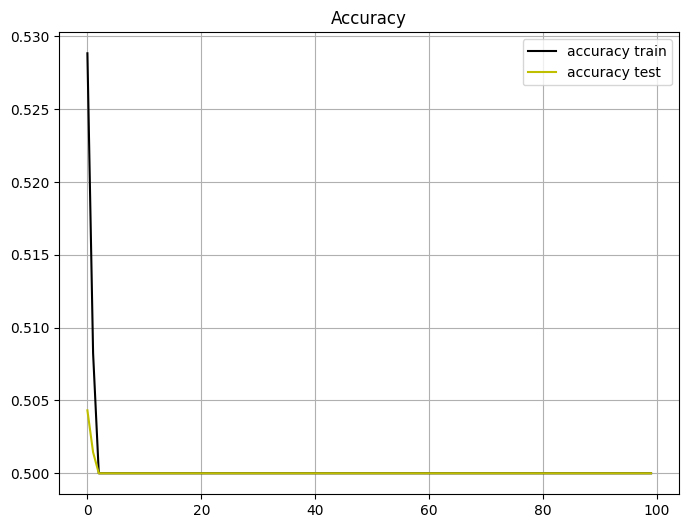

In [ ]:
plt.title('Accuracy')
plt.plot(svm.steps, svm.accuracy_train, 'k', label = 'accuracy train')
plt.plot(svm.steps, svm.accuracy_test, 'y', label = 'accuracy test')
plt.grid()
plt.legend()
plt.show()